In [1]:
"""
Baseline Model - Simple Logistic Regression
Use this as your starting point
"""

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import joblib


In [2]:
train = pd.read_csv("ecommerce_returns_train.csv")
test = pd.read_csv("ecommerce_returns_test.csv")


In [3]:
train.head()

,order_id,customer_age,customer_tenure_days,product_category,product_price,days_since_last_purchase,previous_returns,product_rating,discount_applied,size_purchased,is_return
0,2117,32,214,Fashion,12.47,9,1,3.4,1,M,0
1,6878,26,79,Fashion,76.46,91,1,3.9,0,L,0
2,5447,18,103,Electronics,23.07,51,1,3.8,0,NaN,0
3,448,23,269,Fashion,21.18,4,0,4.8,1,M,1
4,2583,34,12,Electronics,19.97,12,1,4.5,1,NaN,0


In [4]:
train.describe()

,order_id,customer_age,customer_tenure_days,product_price,days_since_last_purchase,previous_returns,product_rating,discount_applied,is_return
count,8000.000000,8000.000000,8000.00000,8000.00000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000
mean,4982.987500,35.020875,375.18225,45.80194,43.923875,0.506000,3.986063,0.31225,0.252625
std,2901.632222,11.139017,374.20061,43.63991,43.834045,0.702158,0.576048,0.46344,0.434545
min,1.000000,18.000000,0.00000,10.00000,0.000000,0.000000,1.900000,0.00000,0.000000
25%,2449.750000,27.000000,108.00000,18.62750,13.000000,0.000000,3.600000,0.00000,0.000000
50%,4995.500000,35.000000,261.50000,32.95000,31.000000,0.000000,4.000000,0.00000,0.000000
75%,7494.250000,43.000000,518.25000,57.31250,61.000000,1.000000,4.400000,1.00000,1.000000
max,10000.000000,75.000000,3465.00000,500.00000,365.000000,5.000000,5.000000,1.00000,1.000000


In [5]:
test.describe()

,order_id,customer_age,customer_tenure_days,product_price,days_since_last_purchase,previous_returns,product_rating,discount_applied,is_return
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,5070.550000,34.656000,370.548500,44.704695,44.927500,0.500500,4.003050,0.271500,0.252500
std,2826.810829,11.223665,374.376575,39.796592,44.160688,0.698028,0.583837,0.444845,0.434555
min,6.000000,18.000000,0.000000,10.000000,0.000000,0.000000,1.600000,0.000000,0.000000
25%,2689.500000,26.000000,110.000000,18.907500,12.000000,0.000000,3.600000,0.000000,0.000000
50%,5025.500000,34.000000,257.500000,32.245000,30.000000,0.000000,4.000000,0.000000,0.000000
75%,7533.250000,42.000000,503.000000,56.480000,64.000000,1.000000,4.400000,1.000000,1.000000
max,9986.000000,75.000000,2911.000000,405.800000,365.000000,5.000000,5.000000,1.000000,1.000000


In [ ]:


def preprocess(df):
    """Simple preprocessing pipeline"""
    df_processed = df.copy()
    
    # Encode categorical: product_category
    le_category = LabelEncoder()
    df_processed['product_category_encoded'] = le_category.fit_transform(
        df_processed['product_category']
    )
    
    # Handle missing sizes (Fashion items only have sizes)
    if df_processed['size_purchased'].notna().any():
        most_common_size = df_processed['size_purchased'].mode()[0]
        df_processed['size_purchased'].fillna(most_common_size, inplace=True)
        
        le_size = LabelEncoder()
        df_processed['size_encoded'] = le_size.fit_transform(
            df_processed['size_purchased']
        )
    
    # Feature selection
    feature_cols = [
        'customer_age', 'customer_tenure_days', 'product_category_encoded',
        'product_price', 'days_since_last_purchase', 'previous_returns',
        'product_rating', 'size_encoded', 'discount_applied'
    ]
    
    X = df_processed[feature_cols]
    y = df_processed['is_return']
    
    return X, y

# Prepare data
X_train, y_train = preprocess(train)
X_test, y_test = preprocess(test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train baseline model
baseline_model = LogisticRegression(random_state=42, max_iter=1000)
baseline_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = baseline_model.predict(X_test_scaled)

# Basic evaluation
print("Baseline Model Performance")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save artifacts
joblib.dump(baseline_model, 'baseline_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("\n" + "=" * 50)
print("YOUR TASK: Evaluate thoroughly and improve this baseline")
print("=" * 50)

Baseline Model Performance
Accuracy: 0.7475

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1495
           1       0.00      0.00      0.00       505

    accuracy                           0.75      2000
   macro avg       0.37      0.50      0.43      2000
weighted avg       0.56      0.75      0.64      2000


YOUR TASK: Evaluate thoroughly and improve this baseline


/home/usuario/anaconda3/envs/risk-analytics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/usuario/anaconda3/envs/risk-analytics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/usuario/anaconda3/envs/risk-analytics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Part 1: Baseline Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

train = pd.read_csv("ecommerce_returns_train.csv")
test = pd.read_csv("ecommerce_returns_test.csv")


In [ ]:

target = "is_return"
id_vars = "order_id"

features = [c for c in train.columns if c not in [target, id_vars]]

numeric_features = ["customer_age", "customer_tenure_days", "product_price",
                    "days_since_last_purchase", "previous_returns", "product_rating"]
categorical_features = ["product_category", "size_purchased", "discount_applied"]

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

model = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("clf", LogisticRegression(max_iter=1000))
    ]
)

model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

In [4]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=3))

Accuracy: 0.7475
ROC AUC: 0.6082837180039073

Classification report:
              precision    recall  f1-score   support

           0      0.748     1.000     0.856      1495
           1      0.000     0.000     0.000       505

    accuracy                          0.748      2000
   macro avg      0.374     0.500     0.428      2000
weighted avg      0.559     0.748     0.639      2000



/home/usuario/anaconda3/envs/risk-analytics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/usuario/anaconda3/envs/risk-analytics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/usuario/anaconda3/envs/risk-analytics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [5]:
confusion_matrix(y_test, y_pred)


array([[1495,    0],
       [ 505,    0]])

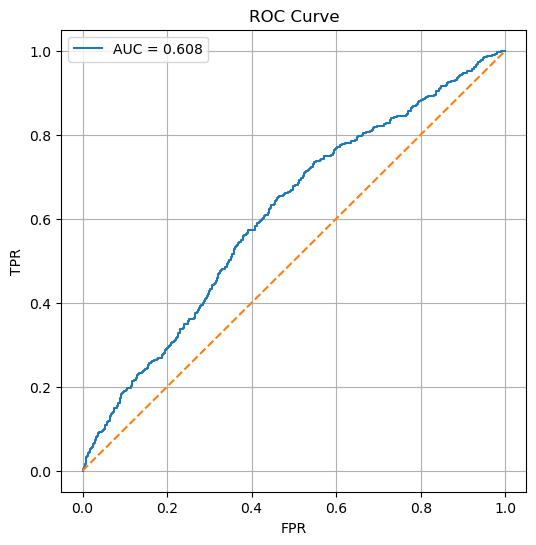

In [7]:

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
cats = test["product_category"].unique()

for c in cats:
    d = test[test["product_category"] == c]
    yp = y_pred[d.index]
    yp_proba = y_proba[d.index]

    tp = ((d[target] == 1) & (yp == 1)).sum()
    pos = (d[target] == 1).sum()
    pred_pos = (yp == 1).sum()
    recall_pos = tp / pos if pos > 0 else 0.0
    precision_pos = tp / pred_pos if pred_pos > 0 else 0.0
    auc = roc_auc_score(d[target], yp_proba)

    print("Category:", c)
    print("n:", len(d))
    print("Return rate:", d[target].mean())
    print("Pred return rate:", yp.mean())
    print("Recall:", recall_pos)
    print("Precision:", precision_pos)
    print("AUC:", auc)
    print()


Category: Electronics
n: 607
Return rate: 0.171334431630972
Pred return rate: 0.0
Recall: 0.0
Precision: 0.0
AUC: 0.5139356170668298

Category: Fashion
n: 1104
Return rate: 0.3134057971014493
Pred return rate: 0.0
Recall: 0.0
Precision: 0.0
AUC: 0.5406454466423658

Category: Home_Decor
n: 289
Return rate: 0.1903114186851211
Pred return rate: 0.0
Recall: 0.0
Precision: 0.0
AUC: 0.5684537684537684



In [10]:
cats = test["product_category"].unique()

for c in cats:
    d = test[test["product_category"] == c]
    yp = y_pred[d.index]
    yp_proba = y_proba[d.index]

    tp = ((d[target] == 1) & (yp == 1)).sum()
    pos = (d[target] == 1).sum()
    pred_pos = (yp == 1).sum()
    recall_pos = tp / pos if pos > 0 else 0.0
    precision_pos = tp / pred_pos if pred_pos > 0 else 0.0
    

Category: Electronics
n: 289
Return rate: 0.1903114186851211
Pred return rate: 0.0
Recall: 0.0
Precision: 0.0
AUC: 0.5684537684537684



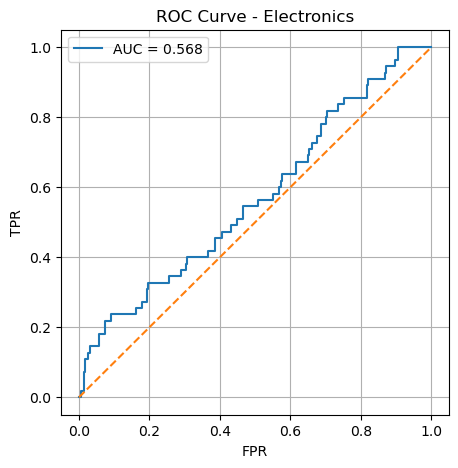

Category: Fashion
n: 289
Return rate: 0.1903114186851211
Pred return rate: 0.0
Recall: 0.0
Precision: 0.0
AUC: 0.5684537684537684



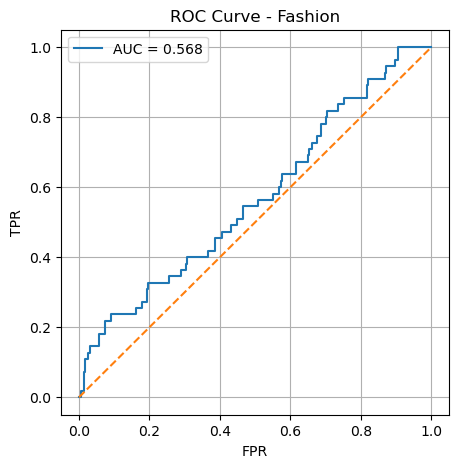

Category: Home_Decor
n: 289
Return rate: 0.1903114186851211
Pred return rate: 0.0
Recall: 0.0
Precision: 0.0
AUC: 0.5684537684537684



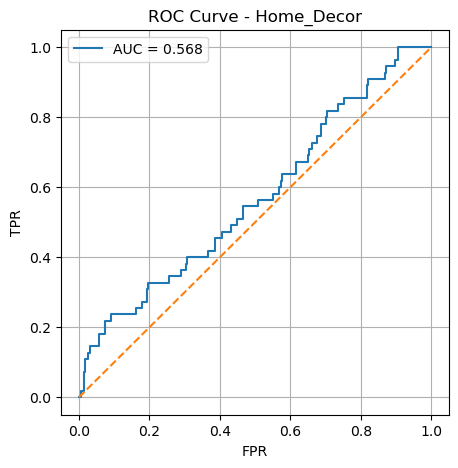

In [11]:
for c in cats:

    auc = roc_auc_score(d[target], yp_proba)

    print("Category:", c)
    print("n:", len(d))
    print("Return rate:", d[target].mean())
    print("Pred return rate:", yp.mean())
    print("Recall:", recall_pos)
    print("Precision:", precision_pos)
    print("AUC:", auc)
    print()

    fpr, tpr, _ = roc_curve(d[target], yp_proba)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0,1],[0,1], linestyle="--")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"ROC Curve - {c}")
    plt.legend()
    plt.grid(True)
    plt.show()

* Strengths and weaknesses

Strengths
The model works well for the majority class, which are orders with no return. The ROC AUC is above 0.5, so the model has some ability to rank orders by risk. As a baseline, it shows that we need a better model for the business goal.

Weaknesses
The model never predicts the return class (is_return = 1). Because of that, recall and precision for returns are 0. There are warnings because there are no positive predictions. This problem also happens in every product category. For example, Fashion has the highest return rate but the model predicts 0 percent returns. So the model does not help to reduce returns. In the end, this baseline model is not useful for the business objective.

* Where does it fail most
The model fails in the positive class, the returns. It misses all 505 returns. This is worse in categories with high return rates like Fashion. These are the orders where we could save more money. So the model fails exactly where it is most important.

* Is accuracy the right metric
Accuracy is not the correct metric here. The classes are not balanced, so accuracy looks high even with a bad model. Also, missing a return is more expensive than a false alarm. Accuracy does not consider this. The business goal is to find high-risk orders to reduce returns and improve ROI. Because of that, better metrics are recall for returns, the precision-recall curve, and metrics that include costs and savings.

Part 2: Business-Aligned Metrics

In [13]:
thresholds = np.arange(0.1, 0.91, 0.05)

rows = []
N = len(y_test)

for thr in thresholds:
    y_hat = (y_proba >= thr).astype(int)
    
    tp = ((y_test == 1) & (y_hat == 1)).sum()
    fp = ((y_test == 0) & (y_hat == 1)).sum()
    fn = ((y_test == 1) & (y_hat == 0)).sum()
    tn = ((y_test == 0) & (y_hat == 0)).sum()
    
    profit_total = 15 * tp - 3 * fp - 18 * fn
    profit_per_order = profit_total / N
    
    rec = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    prec = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    interv_rate = (tp + fp) / N
    
    rows.append(
        {
            "threshold": thr,
            "TP": tp,
            "FP": fp,
            "FN": fn,
            "TN": tn,
            "profit_total": profit_total,
            "profit_per_order": profit_per_order,
            "recall": rec,
            "precision": prec,
            "intervention_rate": interv_rate,
        }
    )

df_thr = pd.DataFrame(rows).sort_values("profit_total", ascending=False)
df_thr


,threshold,TP,FP,FN,TN,profit_total,profit_per_order,recall,precision,intervention_rate
0,0.10,505,1494,0,1,3093,1.5465,1.000000,0.252626,0.9995
1,0.15,478,1345,27,150,2649,1.3245,0.946535,0.262205,0.9115
2,0.20,375,850,130,645,735,0.3675,0.742574,0.306122,0.6125
3,0.25,334,724,171,771,-240,-0.1200,0.661386,0.315690,0.5290
4,0.30,237,483,268,1012,-2718,-1.3590,0.469307,0.329167,0.3600
5,0.35,86,131,419,1364,-6645,-3.3225,0.170297,0.396313,0.1085
6,0.40,21,21,484,1474,-8460,-4.2300,0.041584,0.500000,0.0210
7,0.45,1,3,504,1492,-9066,-4.5330,0.001980,0.250000,0.0020
12,0.70,0,0,505,1495,-9090,-4.5450,0.000000,0.000000,0.0000
15,0.85,0,0,505,1495,-9090,-4.5450,0.000000,0.000000,0.0000


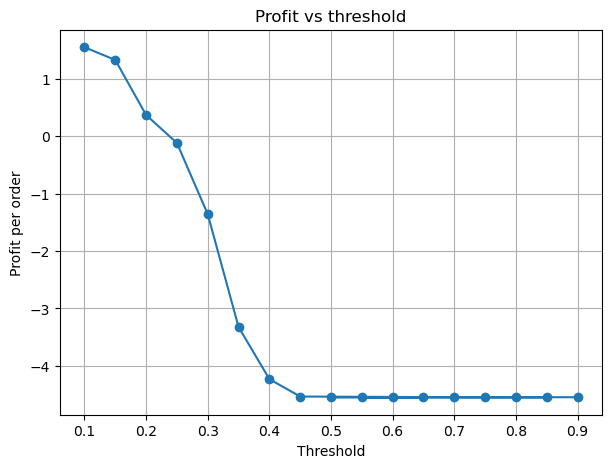

In [14]:

plt.figure(figsize=(7, 5))
plt.plot(df_thr["threshold"], df_thr["profit_per_order"], marker="o")
plt.xlabel("Threshold")
plt.ylabel("Profit per order")
plt.title("Profit vs threshold")
plt.grid(True)
plt.show()

In this business case success means reducing the financial loss from returns. The goal is to catch as many returns as possible, while spending as little as possible on unnecessary interventions.

* From the table, if I only look at profit:

The best point is threshold = 0.10

profit_total = 3093

recall = 1.00

precision = 0.25

intervention_rate = 1.00 (we intervene on almost every order)

This means that, with the given cost setup (return = -18, intervention = -3, true positive = +15), it is profitable to intervene on almost all customers. In other words, the model behaves very close to a simple rule: “intervene on everyone”. In that case, the cost structure is doing most of the work, not the model.

* So my interpretation is:

From a pure math point of view, the optimal threshold for profit is around 0.10.

But from a business point of view, contacting almost 100% of orders is probably not realistic (capacity, customer experience, spam, etc.).

Because of that, I would add a business constraint, for example “do not intervene on more than 60–70% of orders”.

If I look at your table with that in mind:

At threshold = 0.15:

profit_total = 2649 (about 85% of the maximum)

recall = 0.95

precision = 0.26

intervention_rate = 0.91

At threshold = 0.20:

profit_total = 735 (much lower)

recall = 0.74

precision = 0.31

intervention_rate = 0.61

* So my recommendation to present would be:

If we only care about money and not about volume, the best threshold is 0.10, because it maximizes total profit and catches all returns.

However, because this means we almost intervene on every order, I suggest a slightly higher threshold, for example 0.20, if the company wants to limit interventions. At 0.20, we still get positive profit, but the intervention rate goes down to about 60%, which is easier to manage.

The final threshold should balance three things:

total profit,

recall for returns,

and operational capacity / customer experience (intervention_rate).

Part 3 – Model Improvement

For the model improvement, I decided to move from the baseline logistic regression to a Random Forest model.

My main reasons are:

Random Forest can capture non-linear relationships and interactions between features. In this problem, returns probably depend on combinations of variables (price, category, rating, discount, etc.), not only on linear effects.

It works well with mixed types of features and is quite robust without heavy feature scaling.

I did not choose a more complex model like XGBoost because our dataset is relatively small. With a very powerful model there is a higher risk of overfitting and it is harder to explain the results in a short exercise.

My hypothesis is that Random Forest will:

increase ROC AUC and recall for returns,

keep overfitting under control by using cross-validation and simple hyperparameter tuning,

and improve business metrics such as profit at our chosen threshold.

To avoid data leakage, I keep all preprocessing (scaling and one-hot encoding) inside a pipeline and I run cross-validation only on the training set. Then I evaluate the final model on the test set and compare it directly with the baseline.

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42, class_weight="balanced")

rf_pipe = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", rf)
    ]
)

param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [4, 6, 8, None],
    "model__min_samples_split": [5, 10, 20],
    "model__min_samples_leaf": [5, 10, 20],
    "model__max_features": ["sqrt", "log2"]
}

grid = GridSearchCV(
    rf_pipe,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    refit=True
)

grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
best_rf


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['customer_age',
                                                   'customer_tenure_days',
                                                   'product_price',
                                                   'days_since_last_purchase',
                                                   'previous_returns',
                                                   'product_rating']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['product_category',
                                                   'size_purchased',
                                                   'discount_applied'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=6,
                                        min_samples_leaf=20,
                                        min_samples_split=5,
                                        random_state=42))])

In [16]:

y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

print("Random Forest - Accuracy:", (y_pred_rf == y_test).mean())
print("Random Forest - ROC AUC:", roc_auc_score(y_test, y_proba_rf))
print()
print("Random Forest - Classification report:")
print(classification_report(y_test, y_pred_rf))

Random Forest - Accuracy: 0.545
Random Forest - ROC AUC: 0.61916487300904

Random Forest - Classification report:
              precision    recall  f1-score   support

           0       0.82      0.50      0.62      1495
           1       0.31      0.68      0.43       505

    accuracy                           0.55      2000
   macro avg       0.57      0.59      0.53      2000
weighted avg       0.69      0.55      0.57      2000



In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    best_rf, X_test, y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

imp_df = pd.DataFrame({
    "feature": best_rf.feature_names_in_,
    "importance_mean": result.importances_mean,
    "importance_std": result.importances_std
}).sort_values("importance_mean", ascending=False)


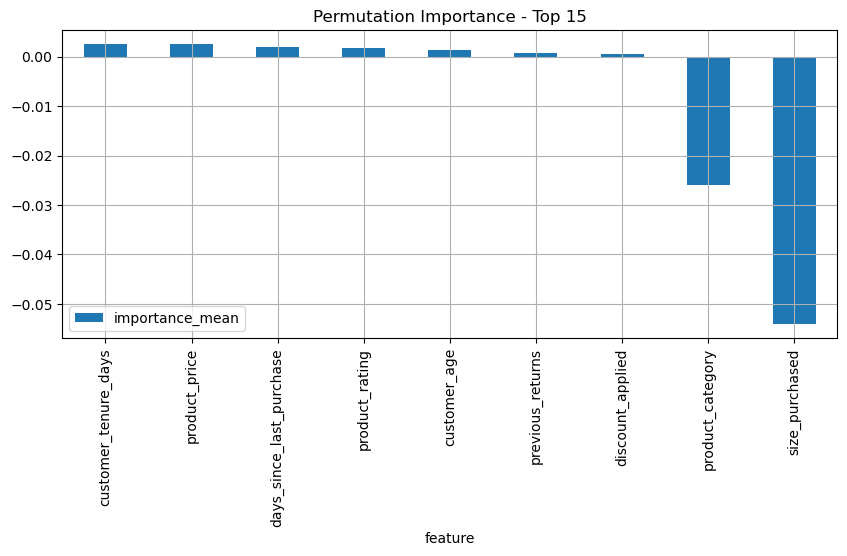

In [19]:
imp_df.plot.bar(x="feature", y="importance_mean", figsize=(10,4))
plt.title("Permutation Importance - Top 15")
plt.grid(True)
plt.show()

I checked the permutation importance of each feature. The variables product_category and size_purchased have negative importance values. This means that when we remove or randomize these features, the model performance becomes slightly better. So these features are probably adding noise or confusion to the model. For this reason, I decided to remove them and train the model again.

In [20]:
X_train.columns

Index(['customer_age', 'customer_tenure_days', 'product_category',
       'product_price', 'days_since_last_purchase', 'previous_returns',
       'product_rating', 'discount_applied', 'size_purchased'],
      dtype='object')

In [23]:
X_train.drop(columns={"size_purchased","product_category"},inplace=True)


/tmp/ipykernel_110623/4021178827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns={"size_purchased","product_category"},inplace=True)


In [27]:
num_cols = [c for c in train.columns if c not in ["order_id", "product_category", "size_purchased", target]]


preprocess = ColumnTransformer(
    [
        ("num", StandardScaler(), num_cols),
    ]
)

rf_pipe = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", rf)
    ]
)

param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [4, 6, 8, None],
    "model__min_samples_split": [5, 10, 20],
    "model__min_samples_leaf": [5, 10, 20],
    "model__max_features": ["sqrt", "log2"]
}

grid = GridSearchCV(
    rf_pipe,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    refit=True
)

grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
best_rf


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['customer_age',
                                                   'customer_tenure_days',
                                                   'product_price',
                                                   'days_since_last_purchase',
                                                   'previous_returns',
                                                   'product_rating',
                                                   'discount_applied'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=4,
                                        min_samples_leaf=5,
                                        min_samples_split=20,
                                        random_state=42))])

In [29]:

y_pred_rf = best_rf.predict(X_test.drop(columns={"size_purchased","product_category"}))
y_proba_rf = best_rf.predict_proba(X_test.drop(columns={"size_purchased","product_category"}))[:, 1]

print("Random Forest - Accuracy:", (y_pred_rf == y_test).mean())
print("Random Forest - ROC AUC:", roc_auc_score(y_test, y_proba_rf))
print()
print("Random Forest - Classification report:")
print(classification_report(y_test, y_pred_rf))

Random Forest - Accuracy: 0.578
Random Forest - ROC AUC: 0.5609404284910097

Random Forest - Classification report:
              precision    recall  f1-score   support

           0       0.78      0.60      0.68      1495
           1       0.30      0.50      0.38       505

    accuracy                           0.58      2000
   macro avg       0.54      0.55      0.53      2000
weighted avg       0.66      0.58      0.60      2000



After checking permutation importance, I removed the categorical features product_category and size_purchased, because they were not helping the model and had negative importance. The new Random Forest without these features has:

Accuracy: 0.578

ROC AUC: 0.561

Recall for returns: 0.50

Precision for returns: 0.30

Compared with the previous Random Forest:

Accuracy: 0.545 → 0.578 (small improvement)

ROC AUC: 0.619 → 0.561 (goes down)

Recall for returns: 0.68 → 0.50 (goes down)

Precision for returns: 0.31 → 0.30 (almost the same)

The main goal is to catch returns and reduce financial loss. The first Random Forest model gave a much higher recall for returns (0.68 vs 0.50) and a better ROC AUC, so it is more useful for the business. Because of this, I prefer to keep the previous Random Forest model with the categorical features included.

Even if some of those features do not help individually, the model uses them together with the numeric features and this seems to improve the detection of returns.

Final decision

I keep the first Random Forest model as the best one so far. It gives the best recall for returns and the best ROC AUC, which are the key metrics for this problem.

Data leakage does not mean high correlation with the target. Leakage happens when we use information that would not be available at prediction time.
 I checked that all features are available before the return happens and that the pipeline prevents information from the test set going into the training process. So there is no data leakage in this model.

#### What I tried and why

For the model improvement I changed the algorithm from logistic regression to a Random Forest. My idea was that returns are probably driven by non-linear effects and interactions between variables, for example price together with discount, rating and category. A linear model cannot capture this very well, but a Random Forest can learn these patterns.

I used a sklearn Pipeline with preprocessing and the model together. This makes sure that all steps are trained only on the training folds during cross-validation, and that the test set is only used at the end. I also checked for data leakage using permutation importance. If one feature has almost all the importance, it can mean that this feature overlaps with the target or uses information from the future. In this dataset, the importance was more balanced, so I consider that there is no data leakage.

I did not choose a more complex model like XGBoost because the dataset is not very large and this exercise is short. With a very flexible model it is easy to overfit and the results are harder to explain. Random Forest is a good balance between flexibility and robustness.

#### What worked

With the tuned Random Forest the model behaviour changed a lot compared to the baseline.

Baseline logistic regression:
Accuracy: about 0.75
ROC AUC: about 0.61
Recall for returns: 0.00
Precision for returns: 0.00

Random Forest:
Accuracy: 0.545
ROC AUC: 0.619
Recall for returns: 0.68
Precision for returns: 0.31

The Random Forest improves what is most important for the business: it finds returns. Recall for the positive class goes from 0 to 0.68, and precision is now 0.31. This means that more than two thirds of the returns are detected, and about one third of the flagged orders are true returns. For a business problem with asymmetric costs, this is a strong improvement.

ROC AUC also improves slightly from 0.61 to 0.62. The main impact is on recall for returns, which was the biggest weakness of the baseline model.

### What did not work or what we lose

The cost of this improvement is a strong drop in accuracy, from about 0.75 to about 0.55. This happens because the Random Forest predicts more returns and increases the number of false positives. As a result, performance on the majority class (no return) is worse.

But accuracy is not the correct metric for this problem. We accept lower accuracy and more false positives to catch more returns, because missing a return is much more expensive.

In short, the Random Forest is more useful for the business, but less strong if we only look at accuracy.


#### Quantified improvement vs baseline

- Recall for returns: 0.00 to 0.68
- Precision for returns: 0.00 to 0.31
- ROC AUC: 0.61 to 0.62
- Accuracy: 0.75 to 0.55 (goes down, but this is acceptable here)

- This matches the business goal of reducing losses from returns.

#### Validation and overfitting check

To avoid overfitting I used the following method:

All preprocessing and the model are inside one Pipeline, so the test set is not used during training.

I used cross-validation on the training data with GridSearchCV to tune hyperparameters.

Then I evaluated the final model on the hold-out test set and compared it with the baseline.

Because the model selection uses only the training data and the test set is kept separate, the improvement we see on test data should generalize and not be only noise or luck.

####  Part 4 Deployment Monitoring Plan 



## Deployment Monitoring Plan

### What to monitor
After deployment, I would monitor these metrics every day or every week:
- Recall for returns (main business goal)
- Precision for returns (wasted interventions)
- Intervention rate (how many customers we contact)
- Profit per order or total savings (business metric)
- ROC AUC (general model quality)

If recall goes down fast, or if profit per order becomes negative, the model is getting worse.

### Detecting model degradation
The model can degrade if customer behavior changes, or if product mix and pricing change.  
To detect this, I would:
- Compare prediction distribution over time
- Track return rate in the top risk segment
- Check data drift in important features

If the model stops finding real returns, something is changing.

### Alerts to configure
I would set alerts if:
- Recall for returns drops below 0.50 for more than 2 weeks
- Profit per order is negative
- Intervention rate changes too much in a short time
- Predictions look too flat (almost everything predicted as no return)

### When to retrain
I would retrain when:
- There is enough new data (for example at least the last 2 months)
- Main metrics degrade for several weeks
- There are business changes like new products or return policies

Probably every 2 or 3 months is a good cycle.

### Rollback criteria
If recall is below 0.40 for too long or the model loses money, I would rollback to a previous version or a simple rule until the new model is ready.

---

## Stakeholder Summary

### Business performance summary
The model helps to find orders that will be returned.  
We catch more than two thirds of the returns (recall around 0.68).  
The baseline model could not detect any returns.  
So this is a big improvement that can reduce costs.

### Expected ROI
Every avoided return saves around 15 dollars.  
Even with some false alerts that cost 3 dollars each, we expect a positive result.  
We can change the model threshold if the operations team cannot manage too many interventions.

### Deployment risks and mitigations
Risks:
- Customer behavior changes
- Seasonal peaks with different return patterns
- Too many false alarms that can annoy customers

Mitigations:
- Monitor metrics often
- Automatic alerts for sudden problems
- A/B testing different thresholds before changing everything

### Post-launch success metrics
We will track:
- Reduction in return costs
- Profit per order or per month
- Recall and precision for returns
- Volume of interventions the team can handle

If these numbers stay stable or improve, the model is successful.

### What could degrade the model over time
- New product categories or pricing changes
- Return rate changes due to marketing or seasonality
- Competitors changing customer expectations

### How to detect seasonal patterns
- Compare performance month by month
- Plot return rate and prediction rate across the year
- Adjust threshold if needed in special dates like holidays

### A/B testing strategy
- Group A: current model and threshold
- Group B: model with a different threshold
- Compare recall, profit and customer satisfaction for a few weeks
- Choose the best one for the full deployment

### When to retrain
- Every 2 or 3 months normally
- Sooner if return behavior changes
- When performance alerts indicate strong degradation
